## PREDICCIÓN DE VENTAS DE NUEVOS LOCALES DE COMIDA RÁPIDA



## Presentación de la empresa

FG Burgers es una multinacional con origen en USA de comida rápida con más de 3000 locales distribuidos por todo el mundo, uno de los países en los que tiene operación es España donde tiene 22 locales en operación en 5 Comunidades Autónomas distintas.

De cara a mejorar sus operaciones y todo su sistema de pedidos y horarios está buscando una solución para la proyección de ventas de sus locales.

## Objetivos de la investigación

El objetivo de la investigación es realizar un modelo de proyección de ventas para poder predecir las ventas a futuro de la marca.



## Equipo de trabajo

*Antonio Elvira García*

Tengo 35 años soy español y actualmente resido entre España y Argentina y me desempeño con gerente de expansión de la marca MTZ, teniendo la responsabilidad la apertura de nuevos locales de la marca en distintos paises.
Mi formación principal fue administración y operacional pero actualmente he incursionado en el mundo del análisis de datos lo que me lleva a cursar la carrera de Data Scientist en CoderHouse conocimientos que pretendo aplicar a mis responsabilidades actuales.

## Fuente del Dataset y criterios de selección

El dataset fue conformada con datos provenientes de distintas fuentes de información de la empresa como son el programa de facturación de ventas de los locales y la base de datos de los locales.

Se decidió tomar este Dataset porque contiene distinta información relevante de los locales actualmente abiertos por la marca para ser usada a la hora de realizar proyecciones de ventas.

## Explicación de los datos en el Dataset

#VENTAS
1.  **Local**: Es el Id de cada local
2.  **Nombre_Local**: Es el nombre interno de cada local
3.  **Fecha**: La fecha en la que se realizó la venta
4.  **Dia_Semana**: Número de día de la semana relacionado con la fecha;


*   1 = Lunes
*   2 = Martes
*   3 = Miércoles
*   4 = Jueves
*   5 = Viernes
*   6 = Sábado
*   7 = Domingo


5.  **Ventas**: Ventas netas expresadas en euros realizadas por el local en ese día.
6.  **Clientes**: Cantidad de clientes atendidos en el local en ese día.
7.  **Laborable**: Indica si la fecha fue laborable;


*   1 = Laborable
*   0 = No laborable

Se consideran como no laborables a criterio de la marca los días festivos y los Sábados y Domingos.


8.  **Festivo**: Indica si la fecha fue festivo.


*   1 = Festivo
*   0 = No Festivo

Los festivos tomados son los festivos nacionales de España


## Importamos las librerías necesarias

In [28]:
!pip install ml_metrics
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
from seaborn import boxplot
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import multiprocessing
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
import ml_metrics as metrics
import time
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

## Cargamos el dataset y los leemos

In [32]:
url_ventas='/content/drive/MyDrive/Data Scientist/Trabajo final/ventas2.csv'
df_ventas = pd.read_csv(url_ventas, sep=';',encoding='latin-1')

## Visualizamos el dataset de ventas

In [33]:
df_ventas

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo
0,1,Gran Via,31/03/2022,4,8290,576,1,0
1,2,Parquesur,31/03/2022,4,6900,442,1,0
2,3,Plaza Rio,31/03/2022,4,5991,412,1,0
3,4,La Gavia,31/03/2022,4,7608,501,1,0
4,5,La Maquinista,31/03/2022,4,6547,464,1,0
...,...,...,...,...,...,...,...,...
47969,18,Diagonal,02/01/2016,5,12181,691,0,1
47970,19,Valencia,02/01/2016,5,11199,628,0,1
47971,20,Paseo de Gracia,02/01/2016,5,11608,663,0,1
47972,21,Xanadu,02/01/2016,5,12569,704,0,1


## Size del dataset

In [34]:
df_ventas.shape

(47974, 8)

## Tipos de datos del dataset de ventas

In [35]:
df_ventas.dtypes

Local            int64
Nombre_Local    object
Fecha           object
Dia_Semana       int64
Ventas           int64
Clientes         int64
Laborable        int64
Festivo          int64
dtype: object

## Convertimos la columna fecha al tipo de dato datetime

In [36]:
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'], format='%d/%m/%Y')
df_ventas

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo
0,1,Gran Via,2022-03-31,4,8290,576,1,0
1,2,Parquesur,2022-03-31,4,6900,442,1,0
2,3,Plaza Rio,2022-03-31,4,5991,412,1,0
3,4,La Gavia,2022-03-31,4,7608,501,1,0
4,5,La Maquinista,2022-03-31,4,6547,464,1,0
...,...,...,...,...,...,...,...,...
47969,18,Diagonal,2016-01-02,5,12181,691,0,1
47970,19,Valencia,2016-01-02,5,11199,628,0,1
47971,20,Paseo de Gracia,2016-01-02,5,11608,663,0,1
47972,21,Xanadu,2016-01-02,5,12569,704,0,1


## Revisamos que se haya realizado de forma correcta

In [37]:
df_ventas.dtypes

Local                    int64
Nombre_Local            object
Fecha           datetime64[ns]
Dia_Semana               int64
Ventas                   int64
Clientes                 int64
Laborable                int64
Festivo                  int64
dtype: object

##Más info del dataset de ventas

In [38]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47974 entries, 0 to 47973
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Local         47974 non-null  int64         
 1   Nombre_Local  47974 non-null  object        
 2   Fecha         47974 non-null  datetime64[ns]
 3   Dia_Semana    47974 non-null  int64         
 4   Ventas        47974 non-null  int64         
 5   Clientes      47974 non-null  int64         
 6   Laborable     47974 non-null  int64         
 7   Festivo       47974 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.9+ MB


##Revisamos si existen nulos

In [39]:
df_ventas.isnull().sum()

Local           0
Nombre_Local    0
Fecha           0
Dia_Semana      0
Ventas          0
Clientes        0
Laborable       0
Festivo         0
dtype: int64

## Principales estadísticos

In [40]:
round(df_ventas.describe())

,Local,Dia_Semana,Ventas,Clientes,Laborable,Festivo
count,47974.0,47974.0,47974.0,47974.0,47974.0,47974.0
mean,11.0,4.0,8042.0,503.0,1.0,0.0
std,6.0,2.0,1484.0,74.0,0.0,0.0
min,1.0,1.0,5200.0,329.0,0.0,0.0
25%,6.0,2.0,6955.0,448.0,0.0,0.0
50%,11.0,4.0,7845.0,498.0,1.0,0.0
75%,17.0,6.0,8883.0,551.0,1.0,0.0
max,22.0,7.0,15550.0,900.0,1.0,1.0


#Insight


*   La media de ventas es **8042**
*   La menor venta fue **5200**
*   La mayor venta fue **15550**
*   La media de clientes fue **503**
*   El menor registro de clientes fue **329**
*   El mayor registro de clientes fue **900** 



##Hacemos un Boxplot con las ventas

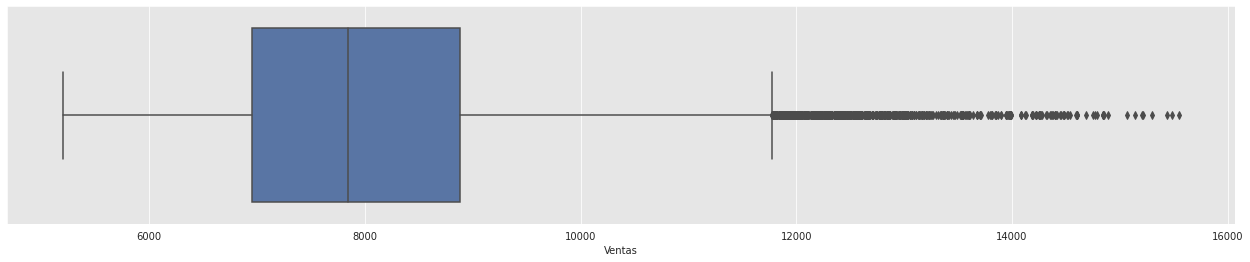

In [43]:
figsize (22, 4)
boxplot(df_ventas.Ventas)

##Realizamos un mapa de calor con las correlaciones

Text(0.5, 1.0, 'Correlaciones del Dataset')

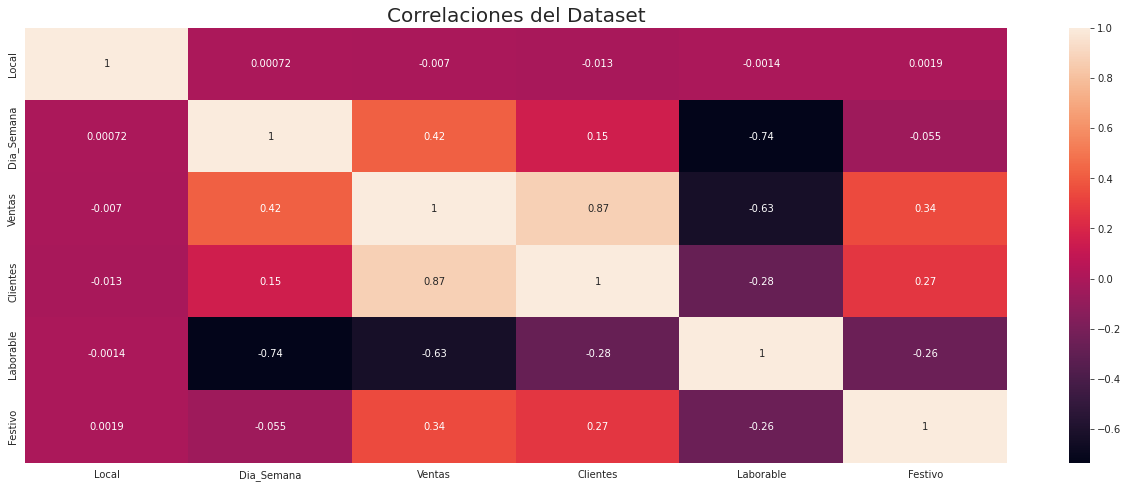

In [44]:
plt.figure(figsize=(22, 8))
df_corr = df_ventas.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);
plt.title('Correlaciones del Dataset', fontsize = 20)

##Hacemos un Pairplot del dataset

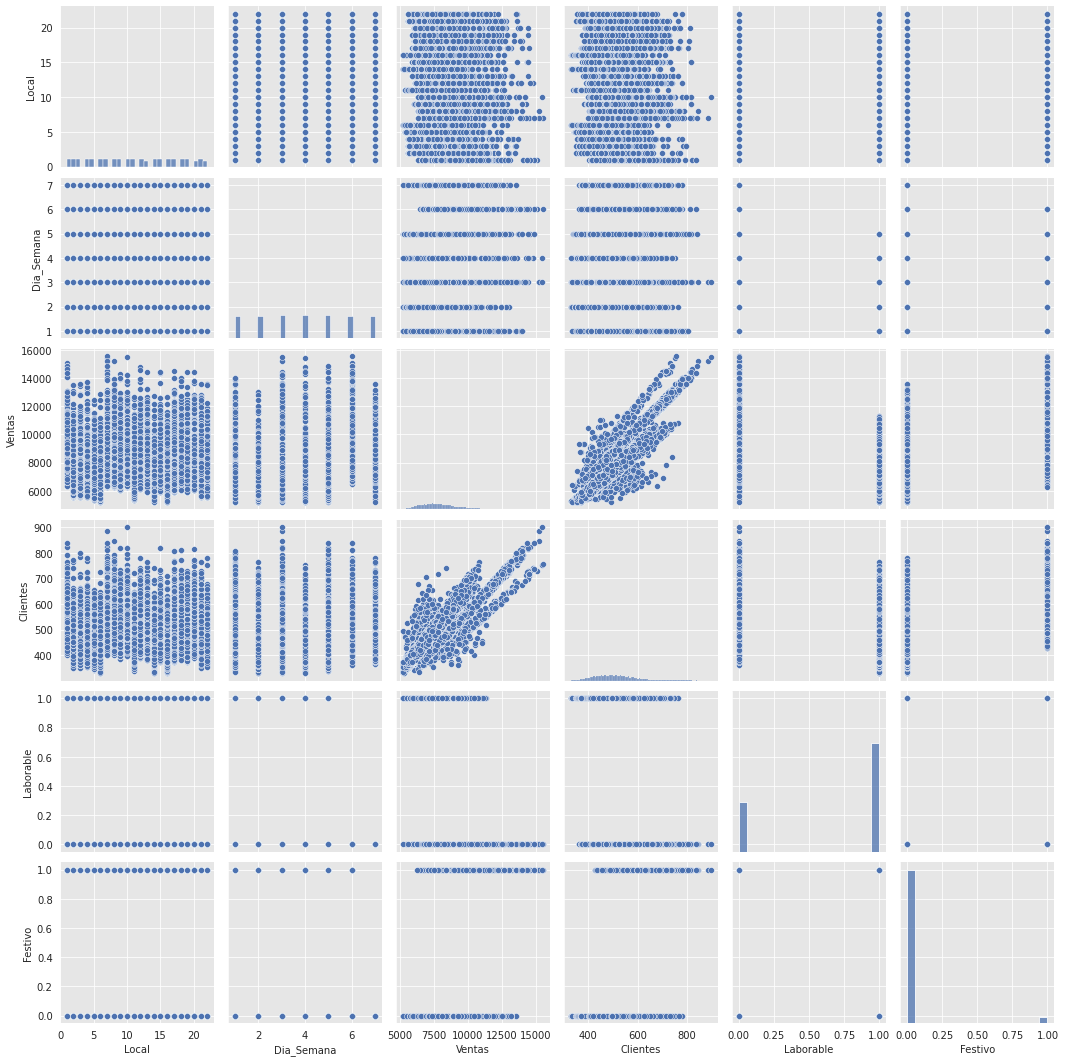

In [ ]:
sns.pairplot(df_ventas)

## Sacamos las correlaciones de la variable a predecir

In [ ]:
correlations_ventas = df_ventas.corr()['Ventas'].sort_values()
correlations_ventas

Laborable    -0.629370
Local        -0.007045
Festivo       0.344418
Dia_Semana    0.421451
Clientes      0.872380
Ventas        1.000000
Name: Ventas, dtype: float64

Podemos observar que la mayor correlación existe entre ventas y clientes, el resto de variables no tienen una correlación muy fuerte

#Preparación de los datos

###Sacamos del Dataset las columnas que nos nos interesan y ya que queremos pronosticar las ventas totales de la empresa agrupamos por fecha.

In [45]:
store_sales = df_ventas.drop(['Local','Nombre_Local','Laborable','Festivo','Dia_Semana','Clientes'], axis=1)
sales = store_sales.groupby('Fecha').sum().reset_index()
sales.set_index('Fecha', inplace = True)
sales

,Ventas
Fecha,
2016-01-02,262732
2016-01-03,227291
2016-01-04,230354
2016-01-05,186906
2016-01-06,186789
...,...
2022-03-27,197510
2022-03-28,159691
2022-03-29,160170


Nos hemos quedado solo con la columna de ventas que es la variable a predecir y con las series de tiempo, que más tarde descompondremos

##Graficamos para ver la tendencia y distribución de las ventas de las ventas

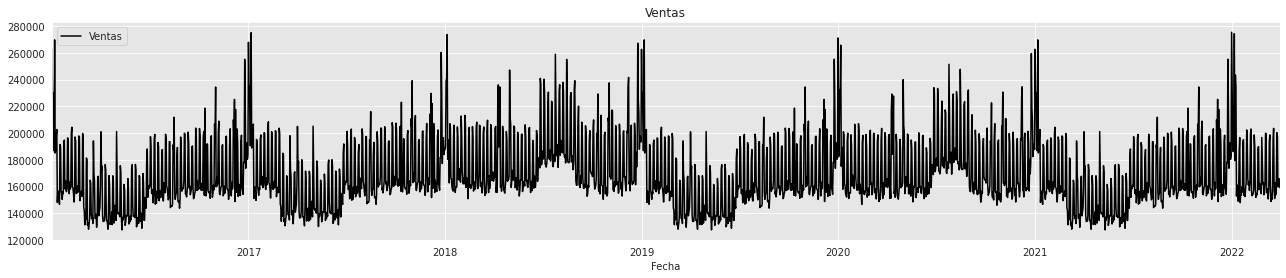

In [46]:
figsize (22, 4)
sales.plot(color = 'black', title = 'Ventas')

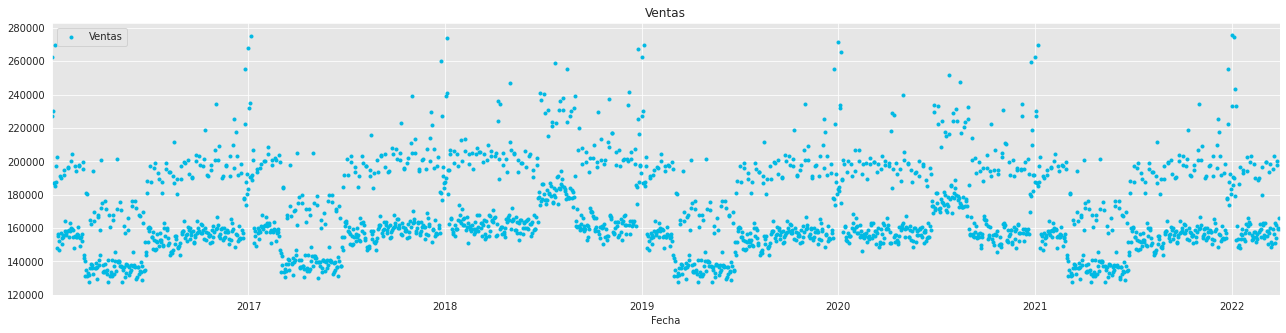

In [47]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = sales.plot(style='.', figsize=(22,5), color=color_pal[5], title='Ventas')

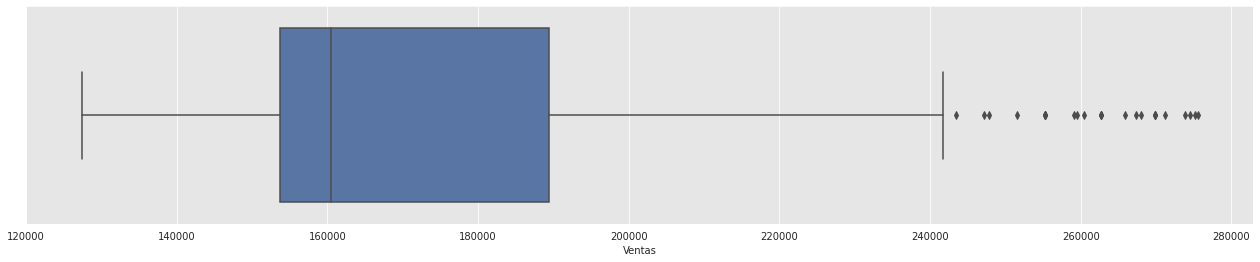

In [53]:
figsize=(22,5)
boxplot(sales.Ventas)

In [ ]:
round(sales.describe())

,Ventas
count,2281.0
mean,169130.0
std,25668.0
min,127380.0
25%,153770.0
50%,160465.0
75%,189464.0
max,275526.0


#Insight


*   La media de ventas es **169130**
*   La menor venta fue **127380**
*   La mayor venta fue **275526**

# XGBOOST

##Dividimos nuestros datos en train y test

In [54]:
split_date = '01-Jan-2022'
data_train_x = sales.loc[sales.index <= split_date].copy()
data_test_x = sales.loc[sales.index > split_date].copy()

In [55]:
data_train_x

,Ventas
Fecha,
2016-01-02,262732
2016-01-03,227291
2016-01-04,230354
2016-01-05,186906
2016-01-06,186789
...,...
2021-12-28,187465
2021-12-29,192557
2021-12-30,180330


In [56]:
data_test_x

,Ventas
Fecha,
2022-01-02,233023
2022-01-03,190637
2022-01-04,186002
2022-01-05,190020
2022-01-06,274468
...,...
2022-03-27,197510
2022-03-28,159691
2022-03-29,160170


##Graficamos como quedarían los datos de test y train

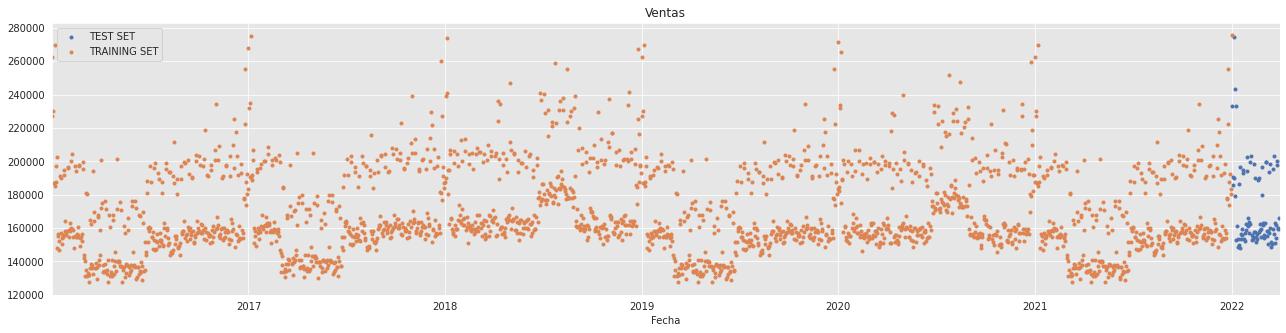

In [57]:
_ = data_test_x \
    .rename(columns={'Ventas': 'TEST SET'}) \
    .join(data_train_x.rename(columns={'Ventas': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(22,5), title='Ventas', style='.')

##Creamos features con la fecha que nos ayuden a captar tendencias

In [58]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [59]:
X_train_x, y_train_x = create_features(data_train_x, label='Ventas')
X_test_x, y_test_x = create_features(data_test_x, label='Ventas')
X_train_x

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Fecha,,,,,,,,
2016-01-02,0,5,1,1,2016,2,2,53
2016-01-03,0,6,1,1,2016,3,3,53
2016-01-04,0,0,1,1,2016,4,4,1
2016-01-05,0,1,1,1,2016,5,5,1
2016-01-06,0,2,1,1,2016,6,6,1
...,...,...,...,...,...,...,...,...
2021-12-28,0,1,4,12,2021,362,28,52
2021-12-29,0,2,4,12,2021,363,29,52
2021-12-30,0,3,4,12,2021,364,30,52


##Creamos el modelo

In [60]:
reg1 = XGBRegressor(nthread=-1, random_state=100)

##Utilizamos Random search para buscar los mejores parámetros para el modelo

In [61]:
params1 = {
    'n_estimators':[100, 500],
    'min_child_weight':[2,3,4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [62]:
CV_reg1 = RandomizedSearchCV(estimator=reg1, param_distributions=params1,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error')
CV_reg1.fit(X_train_x, y_train_x)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(nthread=-1, random_state=100),
                   n_iter=100,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'eta': [0.3, 0.4, 0.5],
                                        'eval_metric': ['rmse'],
                                        'gamma': [0.3, 0.4, 0.5],
                                        'max_depth': [2, 3, 4, 6, 7],
                                        'min_child_weight': [2, 3, 4, 5],
                                        'n_estimators': [100, 500],
                                        'objective': ['reg:squarederror',
                                                      'reg:tweedie'],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_mea

In [63]:
CV_reg1.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'eta': 0.4,
 'eval_metric': 'rmse',
 'gamma': 0.3,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.9}

##Creamos y entrenamos el modelo definitivo

In [64]:
XGB1= XGBRegressor(
    random_state=100,
    n_estimators= 500,
    min_child_weight= 5, 
    gamma= 0.5,  
    subsample= 0.9 ,
    colsample_bytree= 0.6, 
    max_depth= 7,
    objective = 'reg:squarederror',
    booster = 'gbtree',
    eval_metric = 'rmse',
    eta= 0.5,
)
XGB1.fit(X_train_x, y_train_x)
XGB1_pred = XGB1.predict(X_test_x)

##Realizamos la predicción y graficamos el resultado

In [67]:
data_test_x['Prediccion'] = XGB1.predict(X_test_x)
df_pred_xgb1 = pd.concat([data_test_x, data_train_x], sort=False)

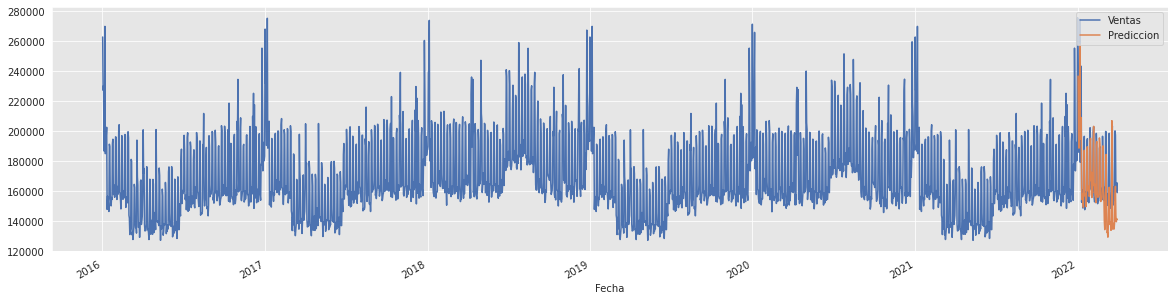

In [ ]:
_ = df_pred_xgb1[['Ventas','Prediccion']].plot(figsize=(20, 5))

In [ ]:
df_pred_xgb1.head().T

Fecha,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
Ventas,233023,190637,186002,190020,274468
date,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00
hour,0,0,0,0,0
dayofweek,6,0,1,2,3
quarter,1,1,1,1,1
month,1,1,1,1,1
year,2022,2022,2022,2022,2022
dayofyear,2,3,4,5,6
dayofmonth,2,3,4,5,6
weekofyear,52,1,1,1,1


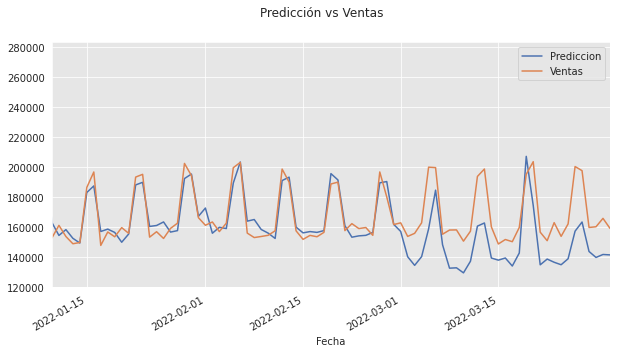

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_pred_xgb1[['Prediccion', 'Ventas']].plot(ax=ax, style=['-','-'])

ax.set_xbound(lower='2022-01-10', upper='2022-03-31')
plot = plt.suptitle('Predicción vs Ventas')

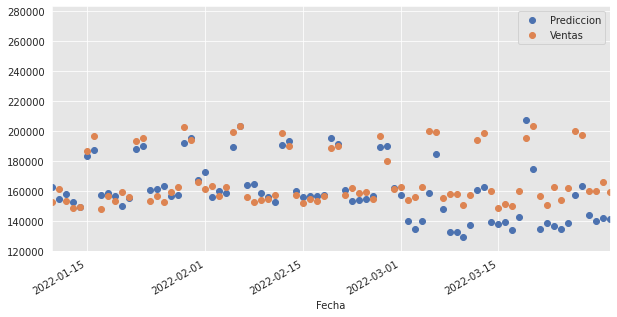

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = df_pred_xgb1[['Prediccion', 'Ventas']].plot(ax=ax, style=['o','o'])

ax.set_xbound(lower='2022-01-10', upper='2022-03-31')

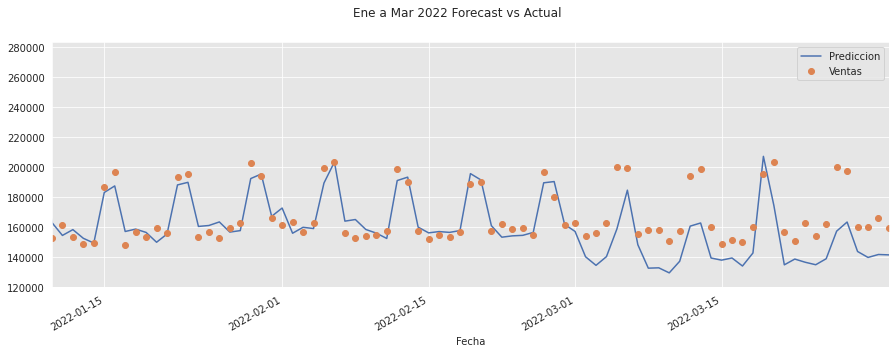

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_pred_xgb1[['Prediccion','Ventas']].plot(ax=ax, style=['-','o'])
ax.set_xbound(lower='2022-01-10', upper='2022-03-31')
plot = plt.suptitle('Ene a Mar 2022 Forecast vs Actual')

##Graficamos la importancia de las features

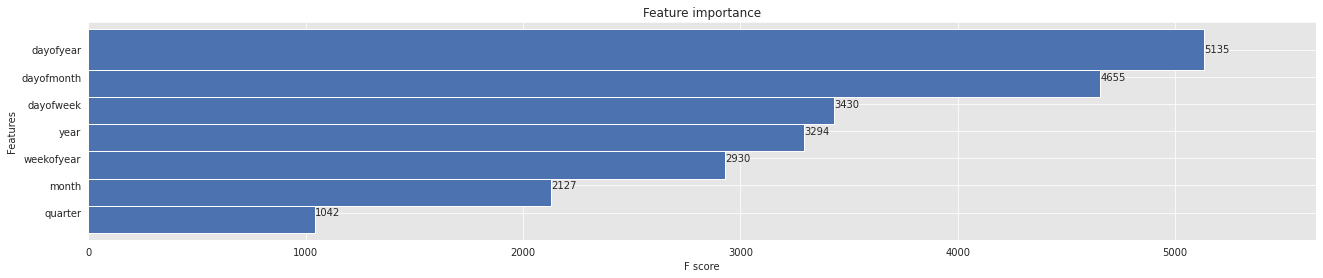

In [65]:
_ = plot_importance(XGB1, height=1.5)

##Sacamos las medidas de performance del modelo

In [98]:
mse_xgb = mean_squared_error(y_true=data_test_x['Ventas'],
                   y_pred=data_test_x['Prediccion'])

r2_xgb= r2_score(y_true=data_test_x['Ventas'],
                   y_pred=data_test_x['Prediccion'])
                  
rmse_xgb= sqrt(mean_squared_error(y_true=data_test_x['Ventas'],
                   y_pred=data_test_x['Prediccion']))

mae_xgb= mean_absolute_error(y_true=data_test_x['Ventas'],
                   y_pred=data_test_x['Prediccion'])

def mean_absolute_percentage_error (y_true, y_pred):
  ###Calculamos el MAPE teniendo y_true e y_pred###
  y_true, y_pred_x= np.array(y_true), np.array (y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

mape_xgb= mean_absolute_percentage_error(y_true=data_test_x['Ventas'],
                                         y_pred=data_test_x['Prediccion'])

xgb_stats = [rmse_xgb, mae_xgb, mape_xgb, r2_xgb]
xgb_stats

[15885.739699193946, 11857.725245786516, 6.782095115209348, 0.5654377617905781]

In [103]:
mape_xgb

6.782095115209348

In [ ]:
data_test_x['error'] = data_test_x['Ventas'] - data_test_x['Prediccion']
data_test_x['abs_error'] = data_test_x['error'].apply(np.abs)
error_by_day = data_test_x.groupby(['year', 'month', 'dayofmonth']) \
    .mean()[['Ventas', 'Prediccion', 'error', 'abs_error']]

##Dataset con las peores predicciones del modelo

In [ ]:
# Peores predicciones
Wpd = error_by_day.sort_values('error', ascending=True).head()
Wpd

Ventas     Prediccion         error     abs_error
year month dayofmonth                                                     
2022 1     7           179314.0  199190.656250 -19876.656250  19876.656250
           5           190020.0  202192.875000 -12172.875000  12172.875000
     2     8           152984.0  164985.953125 -12001.953125  12001.953125
     3     19          195105.0  207036.078125 -11931.078125  11931.078125
     2     1           161154.0  172622.062500 -11468.062500  11468.062500

##Dataset con las mejores predicciones del modelo

In [ ]:
# Mejores predicciones
Bpd = error_by_day.sort_values('abs_error', ascending=True).head()
Bpd

Ventas     Prediccion       error   abs_error
year month dayofmonth                                                 
2022 2     28          161654.0  161755.687500 -101.687500  101.687500
           6           203019.0  203276.734375 -257.734375  257.734375
     1     14          149668.0  149330.984375  337.015625  337.015625
           21          155798.0  155349.765625  448.234375  448.234375
           31          166205.0  167115.781250 -910.781250  910.781250

##Hacemos predicciones para los próximos dos meses y las guardamos

In [ ]:
url_predicciones='/content/drive/MyDrive/Data Scientist/Trabajo final/proyecciones.xlsx'
test = pd.read_excel(url_predicciones, parse_dates=[0], index_col=[0] )
pred_x, pred_y = create_features(test, label='Ventas')

test['Predicciones_xgb'] = XGB1.predict(pred_x)

test.drop(['Ventas','hour','dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'date'], axis=1, inplace=True)
test.head(61)

,Predicciones_xgb
Fecha,
2022-04-01,167519.140625
2022-04-02,210972.890625
2022-04-03,172278.890625
2022-04-04,141294.546875
2022-04-05,140522.500000
...,...
2022-05-27,138093.812500
2022-05-28,167836.546875
2022-05-29,167500.828125


###Probamos el modelo haciendo una división aleatoria de un 70%-30% de train test

In [ ]:
data_train_a, data_test_a = train_test_split(sales, test_size = 0.30, random_state = 100) 

In [ ]:
X_train_a, y_train_a = create_features(data_train_a, label='Ventas')
X_test_a, y_test_a = create_features(data_test_a, label='Ventas')
X_train_a

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Fecha,,,,,,,,
2019-12-18,0,2,4,12,2019,352,18,51
2020-08-20,0,3,3,8,2020,233,20,34
2017-12-06,0,2,4,12,2017,340,6,49
2019-12-04,0,2,4,12,2019,338,4,49
2016-02-13,0,5,1,2,2016,44,13,6
...,...,...,...,...,...,...,...,...
2016-12-17,0,5,4,12,2016,352,17,50
2021-04-15,0,3,2,4,2021,105,15,15
2016-03-21,0,0,1,3,2016,81,21,12


In [ ]:
XGBA= XGBRegressor(
    random_state=100,
    n_estimators= 500,
    min_child_weight= 5, 
    gamma= 0.5,  
    subsample= 0.9 ,
    colsample_bytree= 0.6, 
    max_depth= 7,
    objective = 'reg:squarederror',
    booster = 'gbtree',
    eval_metric = 'rmse',
    eta= 0.5,
)
XGBA.fit(X_train_a, y_train_a)
XGBA_pred = XGBA.predict(X_test_a)

In [ ]:
data_test_a['Prediccion'] = XGBA.predict(X_test_a)
df_pred_xgbA = pd.concat([data_test_a, data_train_a], sort=False)

##Observamos que si bien el modelo pierde algo de eficiencia todavía es capaz de predecir con acierto

In [ ]:
r2_xgba= r2_score(y_true=data_test_a['Ventas'],
                   y_pred=data_test_a['Prediccion'])
r2_xgba

0.7647338478472632

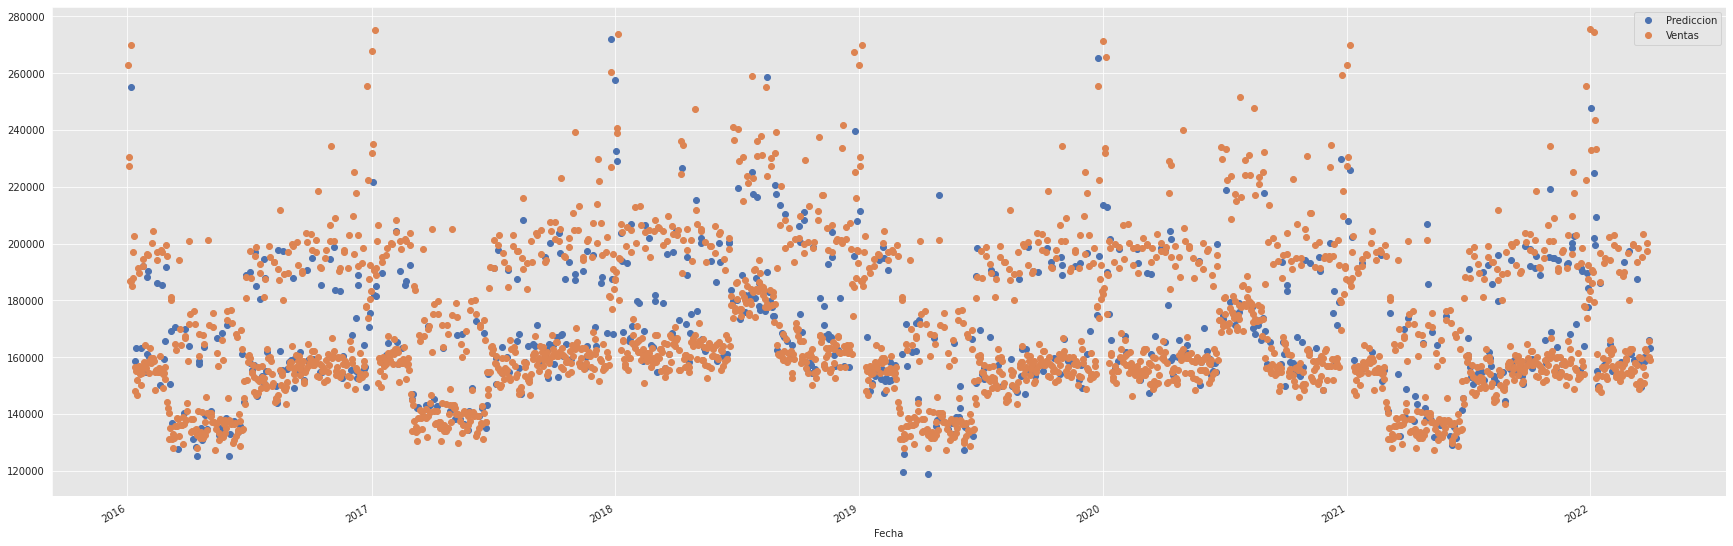

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(30)
_ = df_pred_xgbA[['Prediccion', 'Ventas']].plot(ax=ax, style=['o','o'])

# RANDOM FOREST

##Dividimos nuestros datos en train y test

In [77]:
split_date = '01-Jan-2022'
data_train_rf = sales.loc[sales.index <= split_date].copy()
data_test_rf = sales.loc[sales.index > split_date].copy()

In [78]:
data_train_rf

,Ventas
Fecha,
2016-01-02,262732
2016-01-03,227291
2016-01-04,230354
2016-01-05,186906
2016-01-06,186789
...,...
2021-12-28,187465
2021-12-29,192557
2021-12-30,180330


In [79]:
data_test_rf

,Ventas
Fecha,
2022-01-02,233023
2022-01-03,190637
2022-01-04,186002
2022-01-05,190020
2022-01-06,274468
...,...
2022-03-27,197510
2022-03-28,159691
2022-03-29,160170


In [80]:
X_train_rf, y_train_rf = create_features(data_train_rf, label='Ventas')
X_test_rf, y_test_rf = create_features(data_test_rf, label='Ventas')
X_train_rf

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Fecha,,,,,,,,
2016-01-02,0,5,1,1,2016,2,2,53
2016-01-03,0,6,1,1,2016,3,3,53
2016-01-04,0,0,1,1,2016,4,4,1
2016-01-05,0,1,1,1,2016,5,5,1
2016-01-06,0,2,1,1,2016,6,6,1
...,...,...,...,...,...,...,...,...
2021-12-28,0,1,4,12,2021,362,28,52
2021-12-29,0,2,4,12,2021,363,29,52
2021-12-30,0,3,4,12,2021,364,30,52


##Creamos el modelo

In [81]:
rfr=RandomForestRegressor(random_state=100)

##Utilizamos Grid Search para buscar los mejores parámetros

In [82]:
param_grid = {
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion' : ['squared_error','mae']
}

In [83]:
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid={'criterion': ['squared_error', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [84]:
CV_rfr.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

##Creamos el modelo definitivo con los parámetros obtenidos

In [85]:
rf=RandomForestRegressor(random_state=100,
                           criterion= 'mae',
                           max_depth= 8,
                           max_features= 'auto',
                           n_estimators= 100)
rf.fit(X_train_rf, y_train_rf)
rf_pred = rf.predict(X_test_rf)

##Vemos las métricas del performance del modelo

In [87]:
rmse_rf = mean_squared_error(
        y_true  = y_test_rf,
        y_pred  = rf_pred,
        squared = False
       )

mae_rf = mean_absolute_error(
        y_true  = y_test_rf,
        y_pred  = rf_pred,
       )

r2_rf = r2_score(
        y_true  = y_test_rf,
        y_pred  = rf_pred,
       )

mape_rf = mean_absolute_percentage_error(y_true=y_test_rf,
                   y_pred=rf_pred)

rf_stats = [rmse_rf, mae_rf, mape_rf, r2_rf]
rf_stats

[15814.022219846973, 11818.05713483146, 6.658967746792643, 0.5693526387626127]

In [107]:
mape_rf

6.658967746792643

##Graficamos las predicciones realizadas

In [ ]:
data_test_rf['Prediccion'] = rf.predict(X_test_rf)
df_all_rf = pd.concat([data_test_rf, data_train_rf], sort=False)

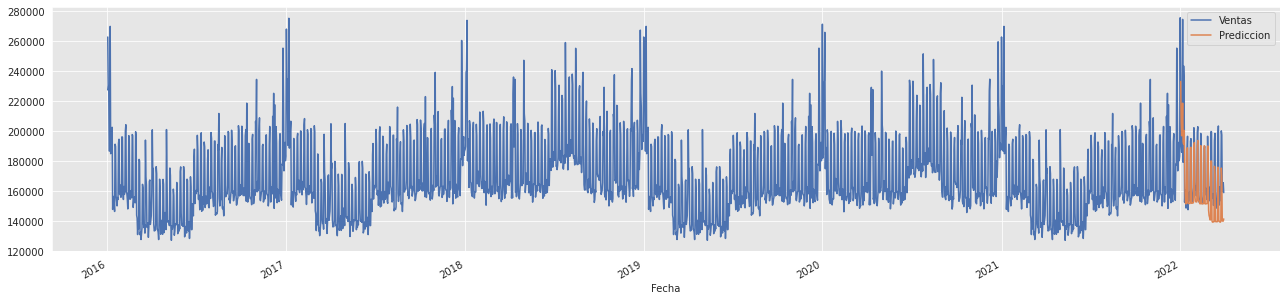

In [ ]:
_ = df_all_rf[['Ventas','Prediccion']].plot(figsize=(22, 5))

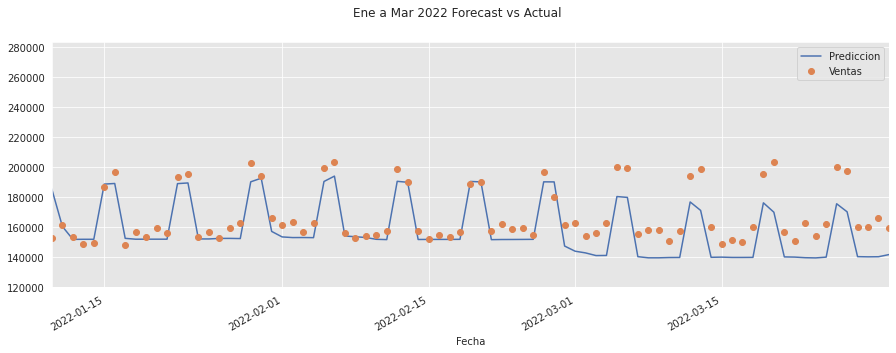

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all_rf[['Prediccion','Ventas']].plot(ax=ax, style=['-','o'])
ax.set_xbound(lower='2022-01-10', upper='2022-03-31')
plot = plt.suptitle('Ene a Mar 2022 Forecast vs Actual')

###Probamos el modelo haciendo una división aleatoria de un 70%-30% de train test

In [ ]:
rfa=RandomForestRegressor(random_state=100,
                           criterion= 'mae',
                           max_depth= 8,
                           max_features= 'auto',
                           n_estimators= 100)
rfa.fit(X_train_a, y_train_a)
rfa_pred = rfa.predict(X_test_a)

In [ ]:
data_test_a['Prediccion'] = rfa.predict(X_test_a)
df_all_rfa = pd.concat([data_test_a, data_train_a], sort=False)

In [ ]:
r2_rfa= r2_score(y_true=data_test_a['Ventas'],
                   y_pred=data_test_a['Prediccion'])
r2_rfa

0.5809530207298041

##Observamos que si bien el modelo pierde algo de eficiencia todavía es capaz de predecir con acierto

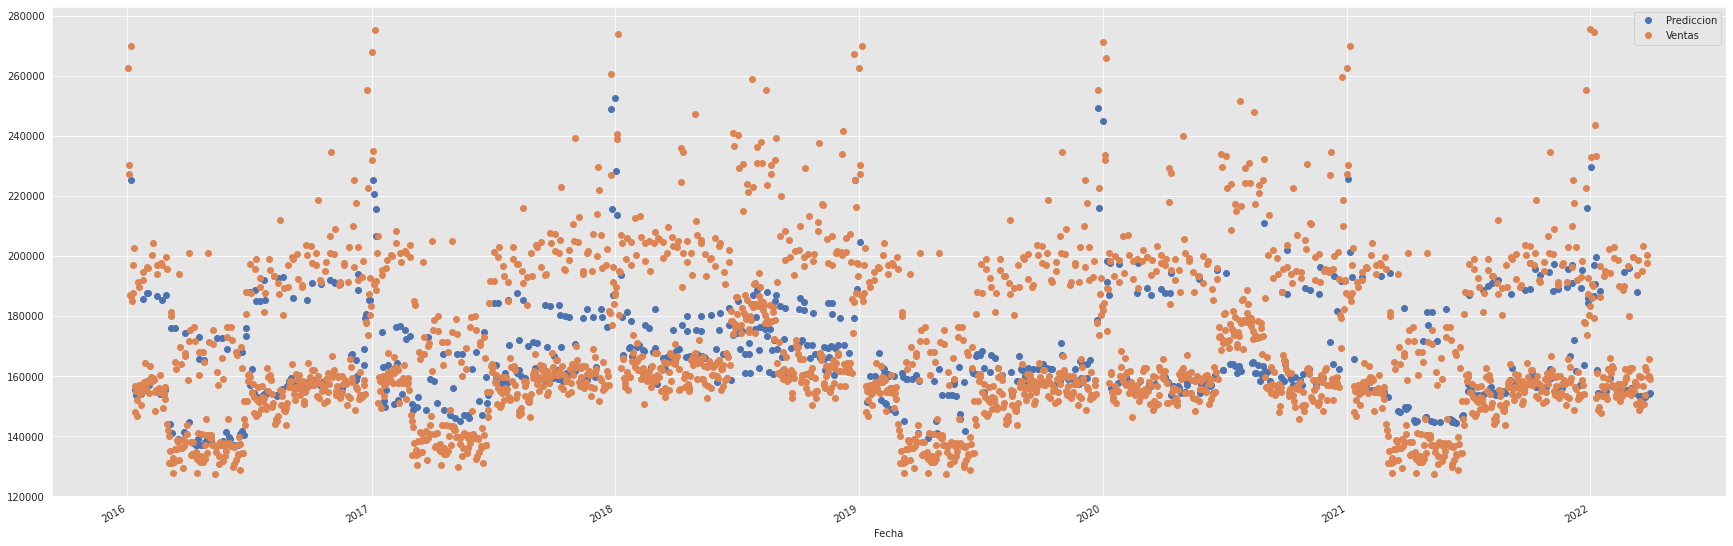

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(10)
f.set_figwidth(30)
_ = df_all_rfa[['Prediccion', 'Ventas']].plot(ax=ax, style=['o','o'])

### PROPHET

#Preparación de los datos

In [124]:
sales_pro = sales.copy()
sales_pro

,Ventas
Fecha,
2016-01-02,262732
2016-01-03,227291
2016-01-04,230354
2016-01-05,186906
2016-01-06,186789
...,...
2022-03-27,197510
2022-03-28,159691
2022-03-29,160170


In [125]:
sales_pro=sales_pro.reset_index()

Para que prophet pueda hacer las predicciones la serie de tiempo tiene que tener el nombre 'ds' y la variable a predecir 'y' por eso cambiamos el nombre de nuestras columnas

In [122]:
sales_p=sales_pro.rename(columns={'Fecha':'ds', 'Ventas':'y'})
sales_p

,ds,y
0,2016-01-02,262732
1,2016-01-03,227291
2,2016-01-04,230354
3,2016-01-05,186906
4,2016-01-06,186789
...,...,...
2276,2022-03-27,197510
2277,2022-03-28,159691
2278,2022-03-29,160170
2279,2022-03-30,165753


In [118]:
sales_p['dayofweek'] = sales_p['ds'].dt.dayofweek
sales_p['quarter'] = sales_p['ds'].dt.quarter
sales_p['month'] = sales_p['ds'].dt.month
sales_p['year'] = sales_p['ds'].dt.year
sales_p['dayofyear'] = sales_p['ds'].dt.dayofyear
sales_p['dayofmonth'] = sales_p['ds'].dt.day
sales_p['weekofyear'] = sales_p['ds'].dt.weekofyear
sales_p

,ds,y,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2016-01-02,262732,5,1,1,2016,2,2,53
1,2016-01-03,227291,6,1,1,2016,3,3,53
2,2016-01-04,230354,0,1,1,2016,4,4,1
3,2016-01-05,186906,1,1,1,2016,5,5,1
4,2016-01-06,186789,2,1,1,2016,6,6,1
...,...,...,...,...,...,...,...,...,...
2276,2022-03-27,197510,6,1,3,2022,86,27,12
2277,2022-03-28,159691,0,1,3,2022,87,28,13
2278,2022-03-29,160170,1,1,3,2022,88,29,13
2279,2022-03-30,165753,2,1,3,2022,89,30,13


##Graficamos nuestro dataset

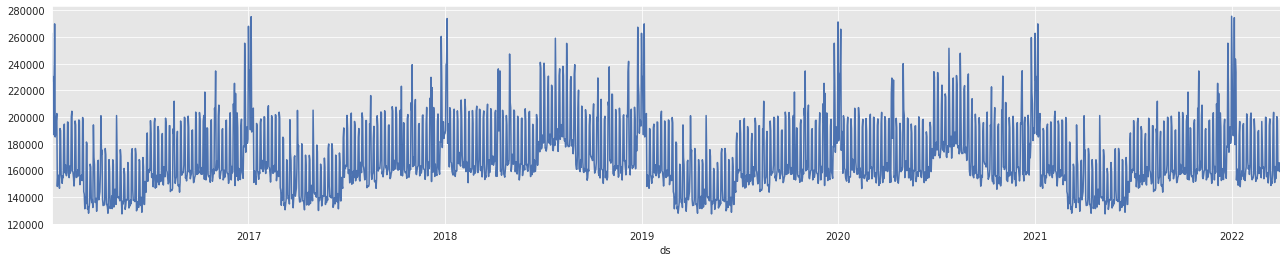

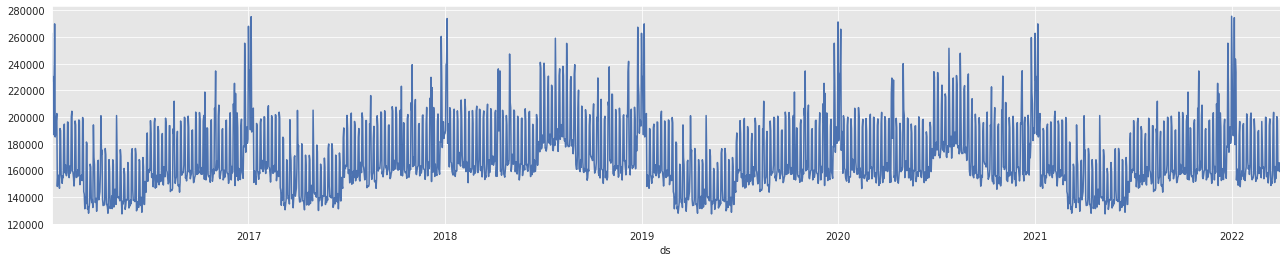

In [127]:

sales_p.set_index('ds').y.plot().get_figure()

In [129]:
split_date = '01-Jan-2022'
data_train_p = sales_p.loc[sales_p.ds <= split_date].copy()
data_test_p = sales_p.loc[sales_p.ds > split_date].copy()

In [130]:
data_train_p

,ds,y
0,2016-01-02,262732
1,2016-01-03,227291
2,2016-01-04,230354
3,2016-01-05,186906
4,2016-01-06,186789
...,...,...
2187,2021-12-28,187465
2188,2021-12-29,192557
2189,2021-12-30,180330
2190,2021-12-31,183470


##Creamos el modelo y lo entrenamos

In [185]:
model = Prophet(seasonality_mode='multiplicative', changepoint_range=1, changepoint_prior_scale=0.75)
model.fit(data_train_p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Creamos un dataframe con la cantidad de días a predecir

In [187]:
future = model.make_future_dataframe(periods=90, freq = 'd')
future.tail()

,ds
2277,2022-03-28
2278,2022-03-29
2279,2022-03-30
2280,2022-03-31
2281,2022-04-01


##Hacemos nuestras predicciones

In [188]:
forecast = model.predict(future)

In [172]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-02,161948.842080,167338.383769,221396.405447,161948.842080,161948.842080,0.203867,0.203867,0.203867,0.010736,0.010736,0.010736,0.193131,0.193131,0.193131,0.0,0.0,0.0,194964.915172
1,2016-01-03,161957.029867,173183.870727,228640.695722,161957.029867,161957.029867,0.234634,0.234634,0.234634,0.043850,0.043850,0.043850,0.190784,0.190784,0.190784,0.0,0.0,0.0,199957.613526
2,2016-01-04,161965.217653,165957.932395,218926.813688,161965.217653,161965.217653,0.194943,0.194943,0.194943,0.008122,0.008122,0.008122,0.186821,0.186821,0.186821,0.0,0.0,0.0,193539.219600
3,2016-01-05,161973.405440,159079.239928,214155.806367,161973.405440,161973.405440,0.157106,0.157106,0.157106,-0.024173,-0.024173,-0.024173,0.181279,0.181279,0.181279,0.0,0.0,0.0,187420.374175
4,2016-01-06,161981.593227,165056.616871,221928.818382,161981.593227,161981.593227,0.189409,0.189409,0.189409,0.015183,0.015183,0.015183,0.174226,0.174226,0.174226,0.0,0.0,0.0,192662.331365


##Nos quedamos solo cn las columnas que nos interesan y graficamos el resultado de nuestra predicción

In [194]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-02,205257.152007,177466.623587,231520.746099
1,2016-01-03,210398.755849,184305.401529,238096.522673
2,2016-01-04,203317.611068,176017.398877,228234.739662
3,2016-01-05,196712.591524,171610.854667,224107.009458
4,2016-01-06,202201.571406,174295.741845,229919.950973


In [193]:
plot_plotly(model, forecast)

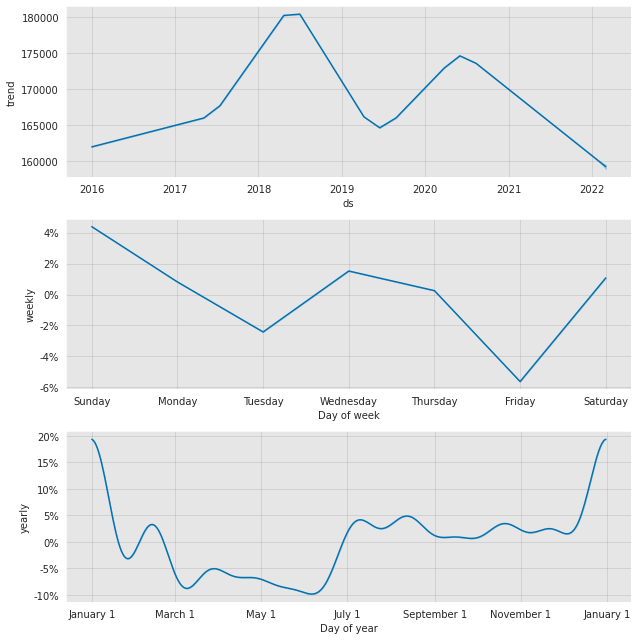

In [175]:
model.plot_components(forecast);

##Trabajamos los datos para crear un dataset en el que tengamos las ventas reales y las que el modelo predijo

In [176]:
df_forecast = forecast[['ds', 'yhat']]
df_forecast

,ds,yhat
0,2016-01-02,194964.915172
1,2016-01-03,199957.613526
2,2016-01-04,193539.219600
3,2016-01-05,187420.374175
4,2016-01-06,192662.331365
...,...,...
2247,2022-02-26,155032.864099
2248,2022-02-27,159078.899819
2249,2022-02-28,152217.581831
2250,2022-03-01,145979.722485


In [177]:
df_forecast.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [178]:
sales_p['ds'] = pd.to_datetime(sales_p['ds'], format='%d/%m/%Y')
sales_p

,ds,y
0,2016-01-02,262732
1,2016-01-03,227291
2,2016-01-04,230354
3,2016-01-05,186906
4,2016-01-06,186789
...,...,...
2276,2022-03-27,197510
2277,2022-03-28,159691
2278,2022-03-29,160170
2279,2022-03-30,165753


In [179]:
metric_df = pd.merge(df_forecast, sales_p, on= ['ds'])
metric_df

,ds,yhat,y
0,2016-01-02,194964.915172,262732
1,2016-01-03,199957.613526,227291
2,2016-01-04,193539.219600,230354
3,2016-01-05,187420.374175,186906
4,2016-01-06,192662.331365,186789
...,...,...,...
2247,2022-02-26,155032.864099,196646
2248,2022-02-27,159078.899819,180042
2249,2022-02-28,152217.581831,161654
2250,2022-03-01,145979.722485,162774


In [180]:
metric_df.tail()

,ds,yhat,y
2247,2022-02-26,155032.864099,196646
2248,2022-02-27,159078.899819,180042
2249,2022-02-28,152217.581831,161654
2250,2022-03-01,145979.722485,162774
2251,2022-03-02,151241.338380,153738


##Sacamos las métricas de performance del modelo y graficamos los resultados

In [181]:
r2_prophet = r2_score(metric_df.y, metric_df.yhat)
r2_prophet

0.2831260487995675

In [182]:
rmse_prophet = metrics.rmse(metric_df.y, metric_df.yhat)
rmse_prophet

21791.02782356921

In [183]:
mae_prophet = mean_absolute_error(metric_df.y, metric_df.yhat)
mae_prophet

17593.866522388656

In [184]:
mape_prophet = mean_absolute_percentage_error(metric_df.y, metric_df.yhat)
mape_prophet

10.11340853837484

Prophet nos permite ver como es el performance del modelo en base a varios parámetros y como es la evolución del performance de este

In [189]:
df_cv = cross_validation(
    model=model,
# Periodo de entrenamiento inicial 
    initial='546 days', 
#Longitud del periodo para el que realizamos el cross validation
    period='90 days', 
#Horizonte de la predicción
    horizon = '31 days'
)

df_cv

INFO:fbprophet:Making 18 forecasts with cutoffs between 2017-09-23 00:00:00 and 2021-12-01 00:00:00


  0%|          | 0/18 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-09-24,183497.529582,165769.087429,202375.806409,159001,2017-09-23
1,2017-09-25,196161.372514,177120.978097,214929.739147,207753,2017-09-23
2,2017-09-26,175259.234446,157199.140293,193979.314565,204467,2017-09-23
3,2017-09-27,158225.904173,138568.071588,174949.312117,160103,2017-09-23
4,2017-09-28,159384.396606,140726.424538,179369.255717,167757,2017-09-23
...,...,...,...,...,...,...
553,2021-12-28,197840.392963,171067.922939,223591.747062,187465,2021-12-01
554,2021-12-29,205288.185749,178611.922423,231844.705887,192557,2021-12-01
555,2021-12-30,203823.706055,176311.331607,229912.587438,180330,2021-12-01
556,2021-12-31,193846.090841,166255.756215,218519.836342,183470,2021-12-01


In [ ]:
df_p = performance_metrics(df=df_cv, rolling_window=0.10)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,6.903642e+08,26274.783049,21464.006185,0.120445,0.116079,0.703267
1,5 days,6.817168e+08,26109.706790,21593.007359,0.121733,0.116079,0.702359
2,6 days,5.928976e+08,24349.489143,19865.651182,0.112835,0.116079,0.735935
3,7 days,4.407176e+08,20993.274552,17192.468363,0.100673,0.101935,0.804900
4,8 days,4.167979e+08,20415.628786,16014.406346,0.092116,0.081188,0.823049
5,9 days,4.805258e+08,21920.899125,16838.412502,0.095948,0.082583,0.823956
6,10 days,5.628129e+08,23723.677807,18621.813281,0.105305,0.091516,0.774047
7,11 days,5.728267e+08,23933.798457,19642.422111,0.112478,0.096217,0.737750
8,12 days,4.674581e+08,21620.778617,18375.147649,0.106485,0.091478,0.754991
9,13 days,4.288743e+08,20709.279420,17251.292655,0.098906,0.085031,0.754083


Text(0.5, 1.0, 'Performance del modelo con Cross validation y RMSE')

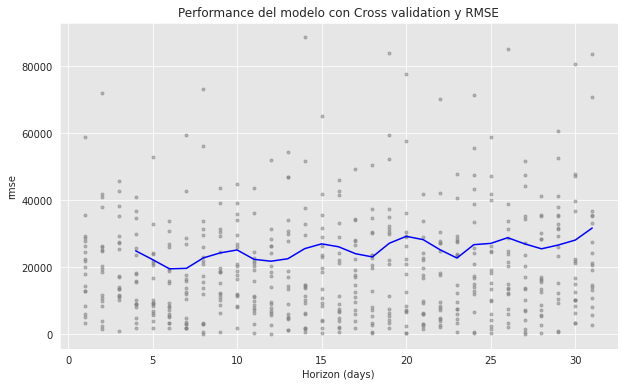

In [190]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('Performance del modelo con Cross validation y RMSE')

Text(0.5, 1.0, 'Performance del modelo con Cross validation y MAPE')

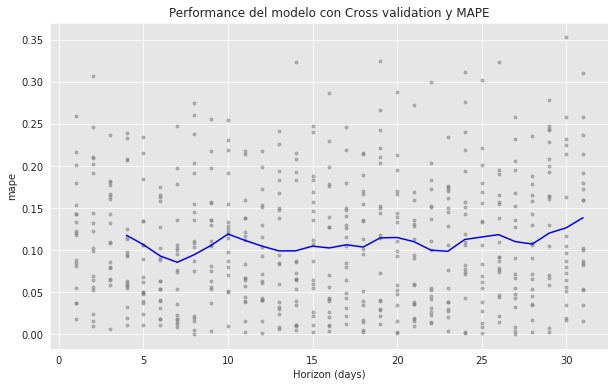

In [191]:
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.title('Performance del modelo con Cross validation y MAPE')

Text(0.5, 1.0, 'Performance del modelo con Cross validation y MAE')

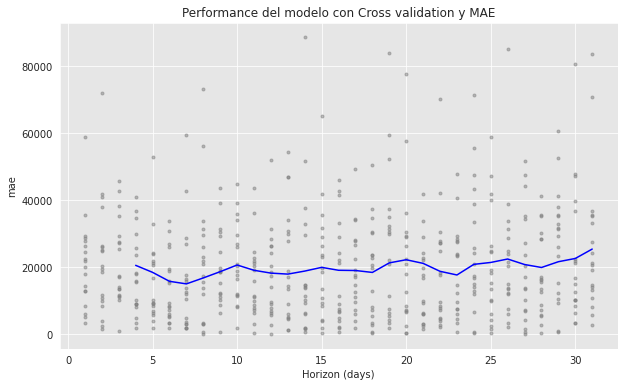

In [192]:
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.title('Performance del modelo con Cross validation y MAE')

#Comparativo de los tres modelos

Tras analizar los tres modelos podemos ver que el que mejor rendimiento tiene de los tres es Random Forest, seguido de XGBoost y por último Prophet

In [195]:
xgb_stats = [rmse_xgb, mae_xgb, mape_xgb, r2_xgb]
rf_stats = [rmse_rf, mae_rf, mape_rf, r2_rf]
prophet_stats = [rmse_prophet, mae_prophet, mape_prophet, r2_prophet]

In [196]:
columnas = ['RMSE','MAE','MAPE','R2']
filas = ['XGBoost','Random Forest','Prophet']
df_metricas = pd.DataFrame([xgb_stats, rf_stats, prophet_stats], columns=columnas, index = filas)
df_metricas

,RMSE,MAE,MAPE,R2
XGBoost,15885.739699,11857.725246,6.782095,0.565438
Random Forest,15814.022220,11818.057135,6.658968,0.569353
Prophet,21791.027824,17593.866522,10.113409,0.283126


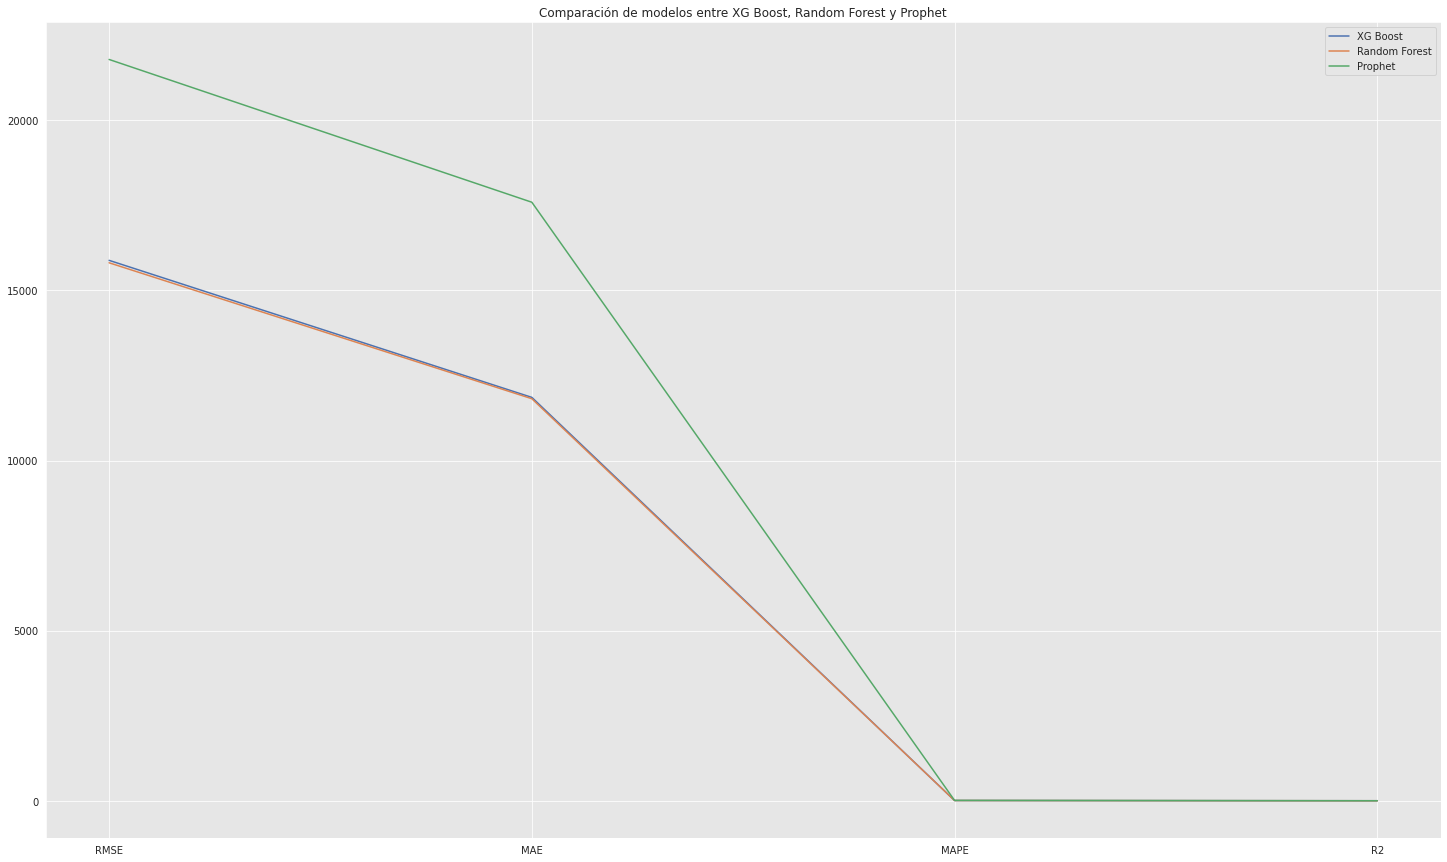

In [200]:
plt.figure(figsize=(25,15))
plt.plot(xgb_stats)
plt.plot(rf_stats)
plt.plot(prophet_stats)
plt.title("Comparación de modelos entre XG Boost, Random Forest y Prophet")
plt.xticks([0,1,2,3], labels=['RMSE','MAE','MAPE','R2'])
plt.legend(["XG Boost", "Random Forest", "Prophet"])
plt.show()